In [1]:
import pandas as pd
import numpy as np

read in data and add a column"Hourly Traffic"

In [2]:
data = pd.read_csv('Citibike Trip Final.csv')
data['Hourly Traffic'] = data['Departures']+ data['Arrivals']
data['Non-busniess'] = np.where(data['Non-business Day'] == True, 1, 0)

calculate the mean and std of daily traffic by  station ID

In [3]:
temp1 = data.groupby('Station ID')['Hourly Traffic'].mean()
temp2 = data.groupby('Station ID')['Hourly Traffic'].std()
temp1 = pd.DataFrame(temp1)
temp2 = pd.DataFrame(temp2)
temp1 = temp1.reset_index()
temp2 = temp2.reset_index()
temp1.columns = ['Station ID','Mean Traffic']
temp2.columns = ['Station ID','Std Traffic']
daily = temp1.join(temp2.set_index('Station ID'), on='Station ID')

In [4]:
new = data.join(daily.set_index('Station ID'), on='Station ID')
new['Abnormal'] = np.where((new['Hourly Traffic'] <= (new['Mean Traffic']-1.96*new['Std Traffic']))|(new['Hourly Traffic'] >= (new['Mean Traffic']+1.96*new['Std Traffic'])), 1,0)
new = new.drop(['Hourly Traffic','Station ID','Date','Non-business Day','Departures','Arrivals','Mean Traffic','Std Traffic','DAILYMaximumDryBulbTemp','DAILYMinimumDryBulbTemp'],axis=1)

In [33]:
new

,Start Hour,DAILYAverageDryBulbTemp,DAILYPrecip,DAILYSnowfall,DAILYSnowDepth,DAILYAverageWindSpeed,DAILYPeakWindSpeed,Non-busniess,Abnormal
0,0,44.0,0.00,0.0,0,5.5,23.0,1,0
1,2,44.0,0.00,0.0,0,5.5,23.0,1,0
2,3,44.0,0.00,0.0,0,5.5,23.0,1,0
3,4,44.0,0.00,0.0,0,5.5,23.0,1,0
4,5,44.0,0.00,0.0,0,5.5,23.0,1,0
5,7,44.0,0.00,0.0,0,5.5,23.0,1,0
6,8,44.0,0.00,0.0,0,5.5,23.0,1,0
7,9,44.0,0.00,0.0,0,5.5,23.0,1,0
8,10,44.0,0.00,0.0,0,5.5,23.0,1,0
9,11,44.0,0.00,0.0,0,5.5,23.0,1,0


In [5]:
train_prob = 0.8
rand = np.random.rand(new.shape[0])
rand_filt = (rand < train_prob)
train_df = new[rand_filt]
test_df = new[(rand_filt == False)]

In [6]:
import sklearn
# Code here
from sklearn.tree import DecisionTreeClassifier
Y = train_df['Abnormal']
X = train_df.drop('Abnormal', 1)
dt = DecisionTreeClassifier(criterion = 'entropy')
model = dt.fit(X, Y)

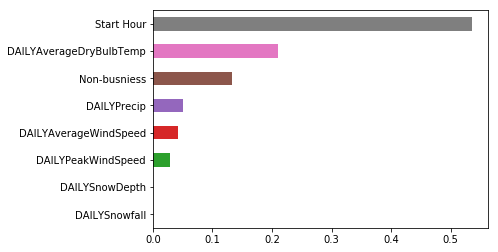

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Code here
importance = pd.Series(model.feature_importances_, index = X.columns)
ranks = importance.sort_values()
ranks.plot.barh()

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor()
regressor.fit(X, Y)
y_test_dt = regressor.predict(test_X)
y_train_dt = regressor.predict(X)
r2_score(test_Y, y_test_dt), r2_score(Y, y_train_dt)

NameError: name 'test_X' is not defined

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
max_depths = [3*x for x in range(2,7)]
min_samples_leafs = [2*x+1 for x in range(6)]
dt_r2 = {depth:[] for depth in max_depths}
# dt_train_r2 = {depth:[] for depth in max_depths}
for max_d in max_depths:
    for min_s in min_samples_leafs:
        regressor = DecisionTreeRegressor(max_depth=max_d, min_samples_leaf=min_s)
        regressor.fit(X, Y)
        y_test_dt = regressor.predict(test_X)
#         y_train_dt = regressor.predict(X_train)
        dt_r2[max_d].append(r2_score(test_Y, y_test_dt))
#         dt_train_r2[max_d].append(r2_score(y_train, y_train_dt))

Best model: max_depths = 18	min_samples_leafs = 1
R²: 0.19813071020638362


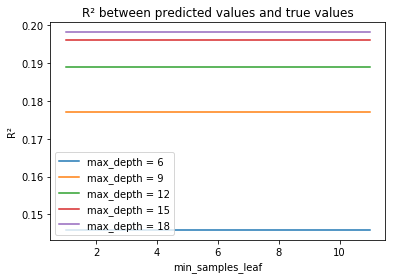

In [47]:
%matplotlib inline
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
for max_d in max_depths:
    plt.plot(min_samples_leafs, dt_r2[max_d])
plt.legend(['max_depth = '+str(x) for x in max_depths])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2'.translate(SUP))
plt.title('R2 between predicted values and true values'.translate(SUP))
r2_array = np.array([dt_r2[x] for x in max_depths])
max_id = np.unravel_index(np.argmax(r2_array), r2_array.shape)
print('Best model: max_depths = {}\tmin_samples_leafs = {}'.format(max_depths[max_id[0]], min_samples_leafs[max_id[1]]))
print('R2:'.translate(SUP), r2_array[max_id])

In [41]:
from sklearn.metrics import accuracy_score
test_X = test_df.drop('Abnormal', 1)
test_Y = test_df['Abnormal']
train_df_pred = model.predict(X)
test_df_pred = model.predict(test_X)
print ("Accuracy for training data is ", accuracy_score(Y,train_df_pred)*100)
print ("Accuracy for test data is ", accuracy_score(test_Y, test_df_pred)*100)

Accuracy for training data is  94.74256673112782
Accuracy for test data is  94.74658677475159


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)
Y_test_pred = model.predict(test_X)
Y_train_pred = model.predict(X)
r2_score(test_Y, Y_test_pred), r2_score(Y, Y_train_pred)

(-0.05568700873636656, -0.055881395157888925)

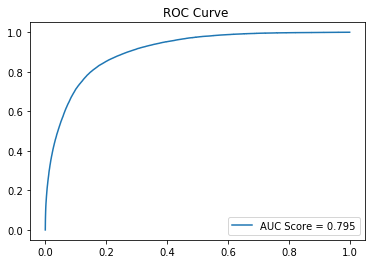

In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_Y, model.predict_proba(test_X)[:,1])
plt.plot(fpr, tpr,label = 'AUC Score = %.3f' % metrics.roc_auc_score(model.predict(test_X),test_Y))
plt.title("ROC Curve ")
plt.legend(loc = 'lower right')

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
y_test_lr = lr.predict(test_X)
y_train_lr = lr.predict(X)
r2_score(test_Y, y_test_lr), r2_score(Y, y_train_lr)

(0.02223016165174785, 0.022591955078655634)